# Social Media Sentiment Analysis

__BACKGROUND__

A large multinational corporation is seeking to automatically identify the sentiment that their customer base talks about on social media. They would like to expand this capability into multiple languages. Many 3rd party tools exist for sentiment analysis, however, they need help with under-resourced languages.

__GOAL__

Train a sentiment classifier (Positive, Negative, Neutral) on a corpus of the provided documents. Your goal is to maximize accuracy. There is special interest in being able to accurately detect negative sentiment. The training data includes documents from a wide variety of sources, not merely social media, and some of it may be inconsistently labeled. Please describe the business outcomes in your work sample including how data limitations impact your results and how these limitations could be addressed in a larger project.

__DATA__ 

Link to data: http://archive.ics.uci.edu/ml/datasets/Roman+Urdu+Data+Set

## Data Loading and Inspection

We first explore the data. We have been warned that the training data "includes documents from a wide variety of sources, not merely social media, and some of it may be inconsistently labeled" and we want to understand the implications of these challenges. 

In [11]:
# Import the necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
import sklearn
import random as random
random.seed(5) 
import os
import keras as k
import csv

In [32]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [72]:
data = pd.read_csv('RomanUrduDataSet.csv',sep=',',names=['text','sentiment'],index_col=False, 
                  quotechar='"',na_values='NULL')

In [73]:
data.shape

(20229, 2)

In [74]:
data.describe()

,text,sentiment
count,20229,20229
unique,19665,4
top,Good,Neutral
freq,23,8929


In [75]:
data['sentiment'].value_counts()

Neutral     8929
Positive    6013
Negative    5286
Neative        1
Name: sentiment, dtype: int64

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20229 entries, 0 to 20228
Data columns (total 2 columns):
text         20229 non-null object
sentiment    20229 non-null object
dtypes: object(2)
memory usage: 316.2+ KB


In [56]:
data.sample(60)

,text,sentiment
20162,Qasim Shoukat Jafry bhaijan aisa ha... 30 saal...,Neutral
15328,Kaash yeh hamare hukamrano ko bhi samajh aa ja...,Positive
6785,Ye ta vo scene,Neutral
11705,Iss moqa per Rahmat Khan ne aik qurbani di Rah...,Negative
533,Ek arsy bd us k sher lota to hran rhgia,Positive
8994,Hahah,Neutral
18027,tmhari kasi situation thi???,Neutral
8319,Amendments dekho,Neutral
17666,Bhai koi us becharay ko tou batao,Negative
9187,Ary in jaiso ko m jaib m dal kr ghumta hn,Neutral


In [78]:
data['text'] = data['text'].apply(str)
data['sentiment'] = data['sentiment'].apply(str)

In [97]:
data['textLength'] = data['text'].apply(len)
data['textWordCount'] = data['text'].apply(lambda x: len(x.split(' ')))

In [80]:
data[data['textLength']==0]

,text,sentiment,textLength
16904,,Neutral,0


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20229 entries, 0 to 20228
Data columns (total 3 columns):
text          20229 non-null object
sentiment     20229 non-null object
textLength    20229 non-null int64
dtypes: int64(1), object(2)
memory usage: 474.2+ KB


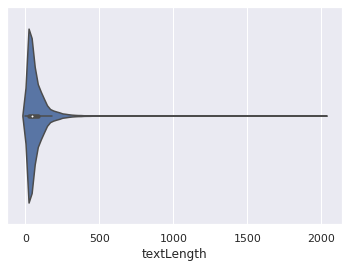

In [84]:
sns.violinplot(data['textLength'])

In [88]:
sum(data['textLength'] > 500)

46

In [93]:
type(data.iloc[data['textLength']>500])

pandas.core.frame.DataFrame

In [94]:
i = 0
for line in data.loc[data['textLength'] > 500,'text']:
    print(line)
    i+=1
    if i >=10:
        break

Gumshoda aur agwa shoda ashkhas ki bazyabi key leye Beuro aur insedad dehsht gerdi key lea aik comition yeh trust aik gair serkari gair seasi aur gair munfiet andoz insani haqooq ki die tanzem hay aur is ski rejgtration Amrica mein bhi ho chuki hay inn ki mosalsal aur bea louse koshishon sey ab tek lakhon sey zaida aeyse quadi reha ho chukey hain jog air qanooni tour par Pakistan aur barony mumalik mein quaid rahey inn mein sey baz jailon mein hi paida huay they aur chalees chalees sal bea qasoor aur bea gunah sakht moshaqqat ki zindagi mahaz laquniat ki waja sey guzar rahey thay neaz bees hazar sey zaidah gumshudah aur agwa shudah bachchon aur bachion ko baziab karaya ja chukka hay halankey iss hawaley sey unhain khasi tanqeed ka nishana banna para.
Insani haqooq key leyeh Ansar Burney ki khidmat key aeteraf mein hukumat Pakistan ki taraf sey unhain sitara e imtaiaz sey nawaza gea aur kai bainul aqwami aizazat bhi unkey hissay mein aeay hain taham jaisa key pehley ziker hua unhain kai

## ToDo:

treat emojis like words

extract punctuation

### Notes:

__English Usage__:

there is light english usage and some posts are all english
list examples

__Emoji's__:

use of emoji's

__Length__:

long tail of very long posts. look at how they might affect any embedding creation

__Capitalization__:

i will make assumption that it's ok to lower case everything


## Model 1: Naive 

## Model 2: LSTM

In [ ]:
import numpy as np
np.random.seed(34)
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform